# Laboratorio Contornos Activos 
### Integrantes
* Brian Peña
* Sandra Cardona

### Inicio de Laboratorio
##### Se usa la guia de estilo de python 
    1 Importacion de las librerias y funciones de los ejemplos dados por los docentes
    2 Se edita la --funcion-- plot_x para que imprima en pantalla 3 imagenes al tiempo 

In [123]:
# Importacion de librerias
from skimage.filters import threshold_otsu
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, io, filters, feature, morphology
from skimage.morphology import square, disk
from scipy import ndimage as ndi
from skimage.filters import gaussian
# Paquetes necesarios para la morfología matemática
from skimage.morphology import erosion, dilation, opening, closing
# Elementos estructurales
from skimage.morphology import disk, diamond, ball, rectangle
from skimage.segmentation import active_contour


# Defino una función para mostrar una imagen por pantalla
# con el criterio que considero más acertado.
def imshow(img):
    fig, ax = plt.subplots(figsize=(7, 7))
# El comando que realmente muestra la imagen
    ax.imshow(img, cmap=plt.cm.gray)
# Para evitar que aparezcan los números en los ejes
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()


# Defino una función para mostrar tres imagenes por pantalla
def plot_x(original, filtered, filter_name):
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3,
                                        figsize=(20, 10), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.axis('off')
    ax1.set_adjustable('box-forced')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.axis('off')
    ax2.set_adjustable('box-forced')
    ax3.imshow(filter_name, cmap=plt.cm.gray)
    ax3.axis('off')
    plt.show()


### Procesado de Imagen

    3 Lectura de imagenes e impresion

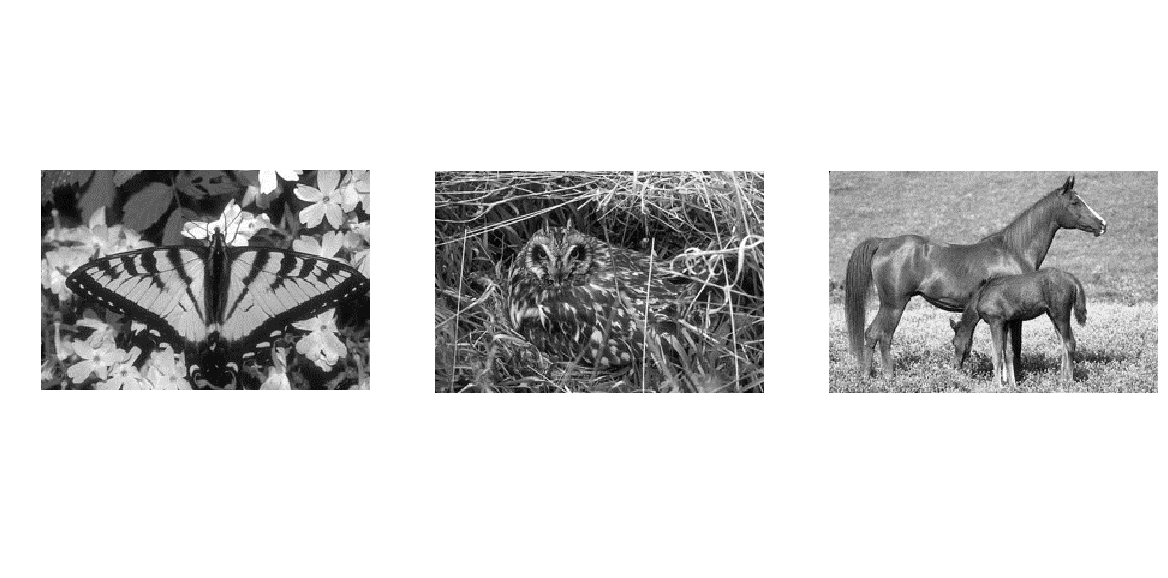

In [4]:
# inicializacion de variables con las imagenes a procesar
img_original = io.imread("tema10_act1a.png")
img2_original = io.imread("tema10_act1b.png")
img3_original = io.imread("tema10_act1c.png")
# impresion de de imagenes
plot_x(img_original, img2_original, img3_original)


    4 Se eliminan detalles de las imagenes con el filtro gaussian
    // se modifican los valores numericos y se establece dejar un valor bajo de filtro para conservar detalles que ayudaran     en el procesado

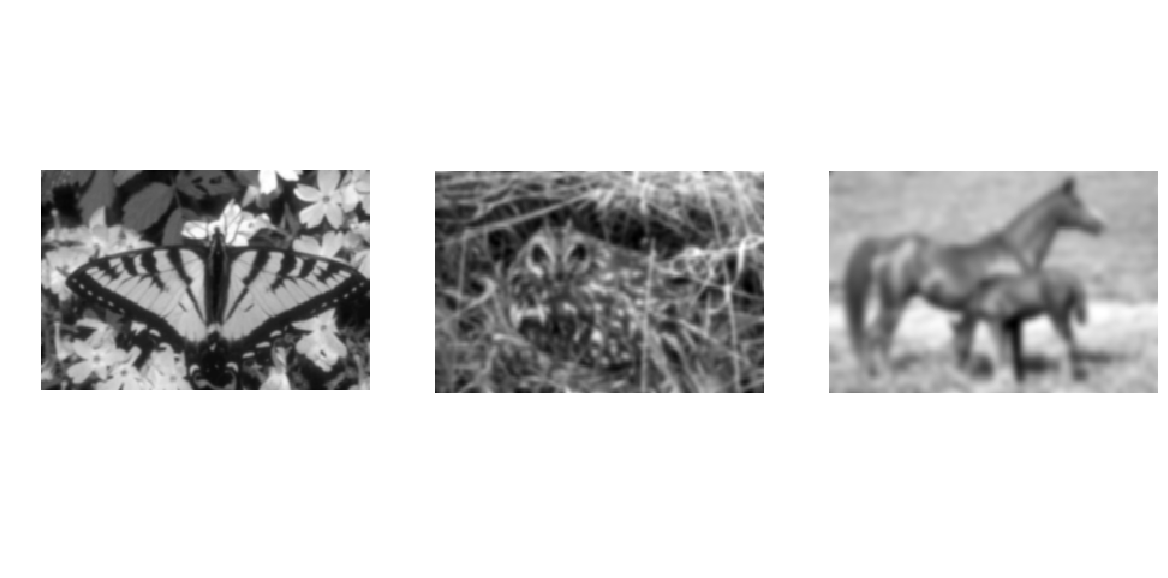

In [72]:
# Se aplica filtro gaussian para eliminar detalles 
img1_sin_detalles = gaussian(img_original, 1)
img2_sin_detalles = gaussian(img2_original, 1.8)
img3_sin_detalles = gaussian(img3_original, 3)
plot_x(img1_sin_detalles, img2_sin_detalles, img3_sin_detalles)


    5 Se usan operadores morfologicos los cuales ayudan a facilitar la deteccion del contorno, al igual que en el puento anterior se modifican los valores del disco y hicieron muchas pruebas para establecer la mejor apariencia visual del resultado.

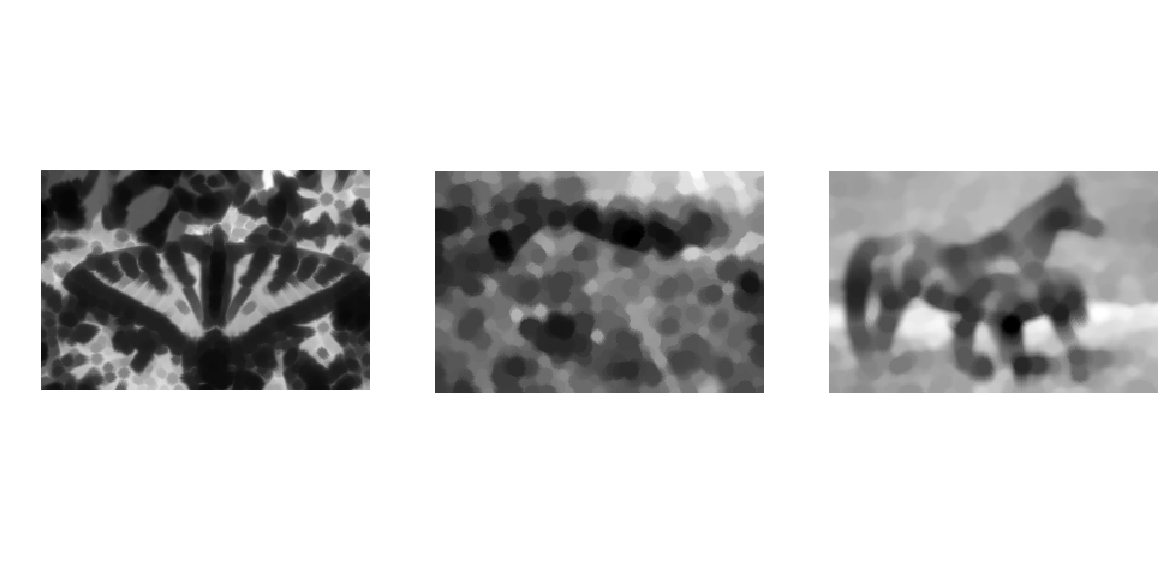

In [124]:
# Uso de operadores morfologicos para apoyar la deteccion de siluetas 
img1_afinando_borde = morphology.opening(
    image=img1_sin_detalles, selem=disk(3))
img1_afinando_borde = morphology.erosion(
    image=img1_afinando_borde, selem=disk(3))
img2_afinando_borde = morphology.opening(
    image=img2_sin_detalles, selem=disk(4))
img2_afinando_borde = morphology.closing(
    image=img2_afinando_borde, selem=disk(6))
img3_afinando_borde = morphology.opening(
    image=img3_sin_detalles, selem=disk(3))
img3_afinando_borde = morphology.closing(
    image=img3_afinando_borde, selem=disk(6))
plot_x(img1_afinando_borde, img2_afinando_borde, img3_afinando_borde)


    6 Para apoyar el paso anterior tambien se usa un umbral , aqui tambien se tuvo de modificar el umbral para establecer la cantidad adecuada de informacion a mostrar

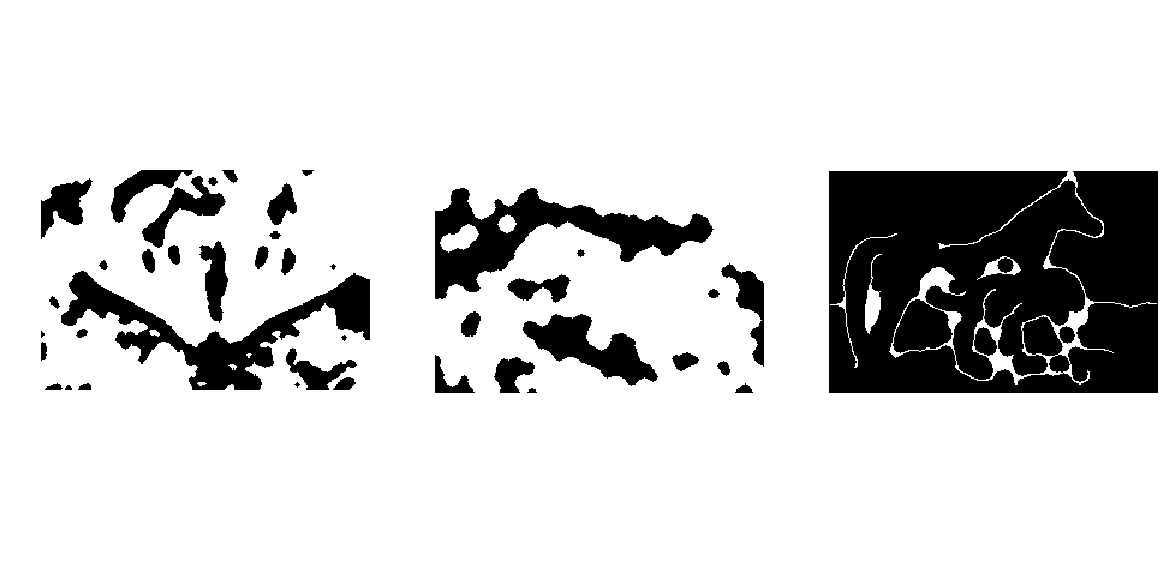

In [125]:
# Establecimiento del umbral para indentificar bordes
thresh_image = img1_afinando_borde > 0.23
thresh_image = morphology.dilation(image=thresh_image, selem=disk(1))
thresh_image2 = img2_afinando_borde > 0.35
thresh_image2 = morphology.dilation(image=thresh_image2, selem=disk(3))
img3_bordes = feature.canny(img3_afinando_borde)
thresh_image3 = img3_bordes > 0.61
thresh_image3 = morphology.closing(image=thresh_image3, selem=disk(6))
plot_x(thresh_image, thresh_image2, thresh_image3)


## Contorno Activo (MARIPOSA)
    1 Se mueve el contorno hasta el centro de la mariposa
    2 Se cambian los valores de alpha , beta y gamma

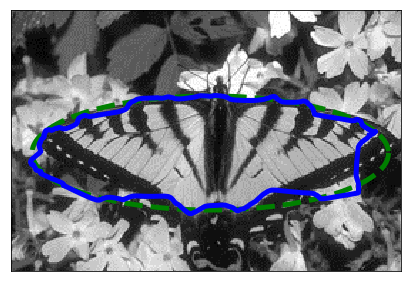

In [405]:
s = np.linspace(0, 2*np.pi, 400)
# Codigo para posicionar la snake para detectar el contorno
x = 140 + 125*np.cos(s)
y = 100 + 40*np.sin(s)
init = np.array([x, y]).T
# se hace la deteccion con la imagen tratada y procesada
snake = active_contour(thresh_image, init, alpha=0.15, beta=0.2, gamma=0.1)
# se hace que la deteccion se pinte sobre la original
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img_original, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--g', lw=5)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=5)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img_original.shape[1], img_original.shape[0], 0])

plt.show()


## Contorno Activo (AVE)
    1 Se mueve el contorno hasta el centro de la AVE
    2 Se cambian los valores de alpha , beta y gamma

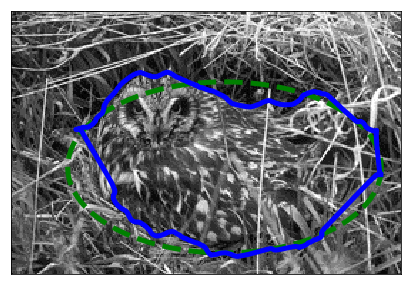

In [522]:
s = np.linspace(0, 2*np.pi, 400)
# Codigo para posicionar la snake para detectar el contorno
x = 150 + 110*np.cos(s)
y = 110 + 60*np.sin(s)
init = np.array([x, y]).T
# se hace la deteccion con la imagen tratada y procesada
snake = active_contour(thresh_image2, init, alpha=0.15, beta=0.2, gamma=0.1)
# se hace que la deteccion se pinte sobre la original
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img2_original, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--g', lw=5)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=5)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img2_original.shape[1], img2_original.shape[0], 0])

plt.show()


## Contorno Activo (CABALLOS)
    1 Se mueve el contorno hasta el centro de la CABALLO
    2 Se cambian los valores de alpha , beta y gamma
    3 Se define que se debe usar 3 snake para generar la silueta mas detallada

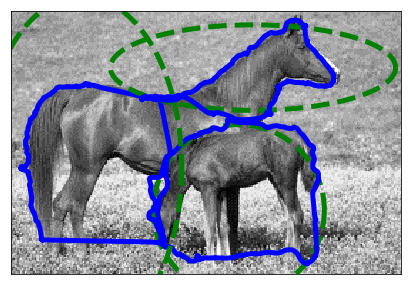

In [126]:
s = np.linspace(0, 2*np.pi, 400)
# Codigo para posicionar la snake para detectar el contorno
x = 160+ 60*np.cos(s)
y = 140 + 60*np.sin(s)
init = np.array([x, y]).T
x1 = 50+ 70*np.cos(s)
y1 = 110+ 120*np.sin(s)
init1 = np.array([x1, y1]).T
x3 = 170+ 100*np.cos(s)
y3 = 40+ 30*np.sin(s)
init3 = np.array([x3, y3]).T
# se hace la deteccion con la imagen tratada y procesada
snake3 = active_contour(thresh_image3, init3, alpha=0.15, beta=0.2, gamma=0.1)
snake1 = active_contour(thresh_image3, init1, alpha=0.15, beta=0.2, gamma=0.1)
snake = active_contour(thresh_image3, init, alpha=0.15, beta=0.2, gamma=0.1)
# se hace que la deteccion se pinte sobre la original
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img3_original, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--g', lw=5)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=5)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img3_original.shape[1], img3_original.shape[0], 0])
ax.plot(init1[:, 0], init1[:, 1], '--g', lw=5)
ax.plot(snake1[:, 0], snake1[:, 1], '-b', lw=5)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img3_original.shape[1], img3_original.shape[0], 0])
ax.plot(init3[:, 0], init3[:, 1], '--g', lw=5)
ax.plot(snake3[:, 0], snake3[:, 1], '-b', lw=5)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img3_original.shape[1], img3_original.shape[0], 0])
plt.show()


# TRABAJO AUTONOMO ANTES DEL LABORATORIO 

A  peticion del profe alberto, adjunto el trabajo autonomo que se realizo antes del laboratorio
como podra observar se llego a un resultado similar pero fue muy manual y especifico.

se hizo eliminacion de caracteristicas pixel a pixel y se usaron muchos metodos para lograrlo 

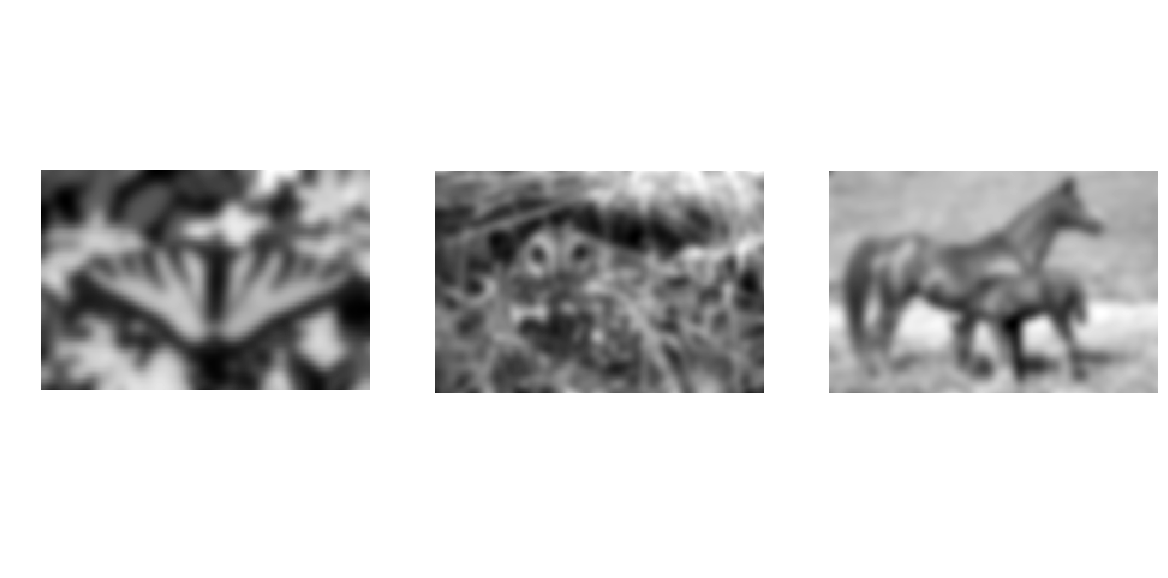

In [138]:
# Se aplica filtro gaussian para eliminar detalles 
img1_sin_detalles = gaussian(img_original, 5)
img2_sin_detalles = gaussian(img2_original, 3.8)
img3_sin_detalles = gaussian(img3_original, 4)
plot_x(img1_sin_detalles, img2_sin_detalles, img3_sin_detalles)


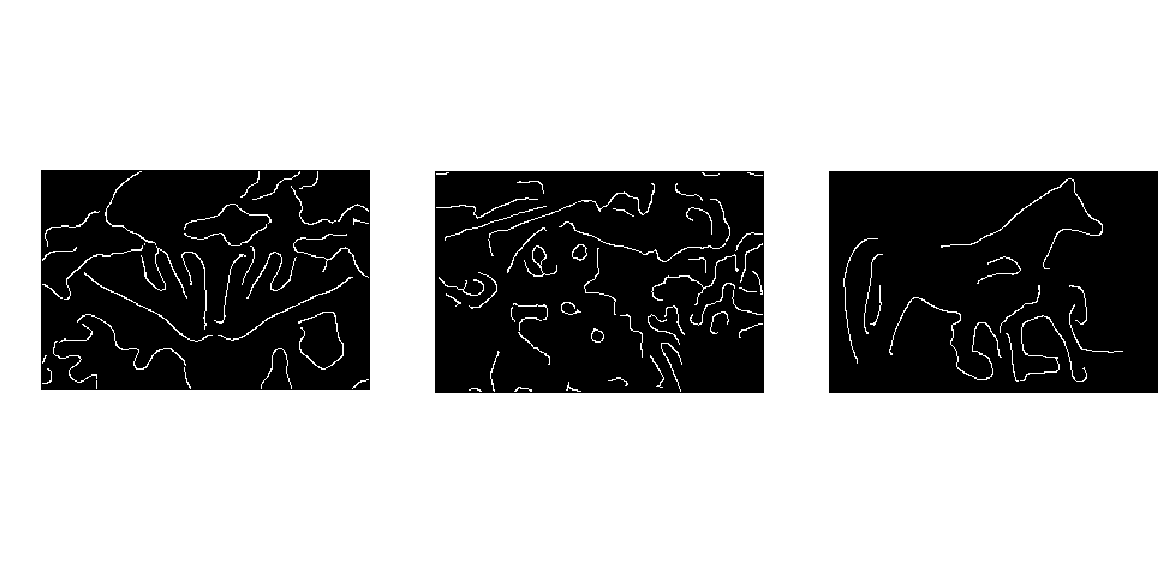

In [139]:
img1_bordes = feature.canny(img1_sin_detalles)
img2_bordes = feature.canny(img2_sin_detalles)
img3_bordes = feature.canny(img3_sin_detalles)
plot_x(img1_bordes,img2_bordes,img3_bordes)


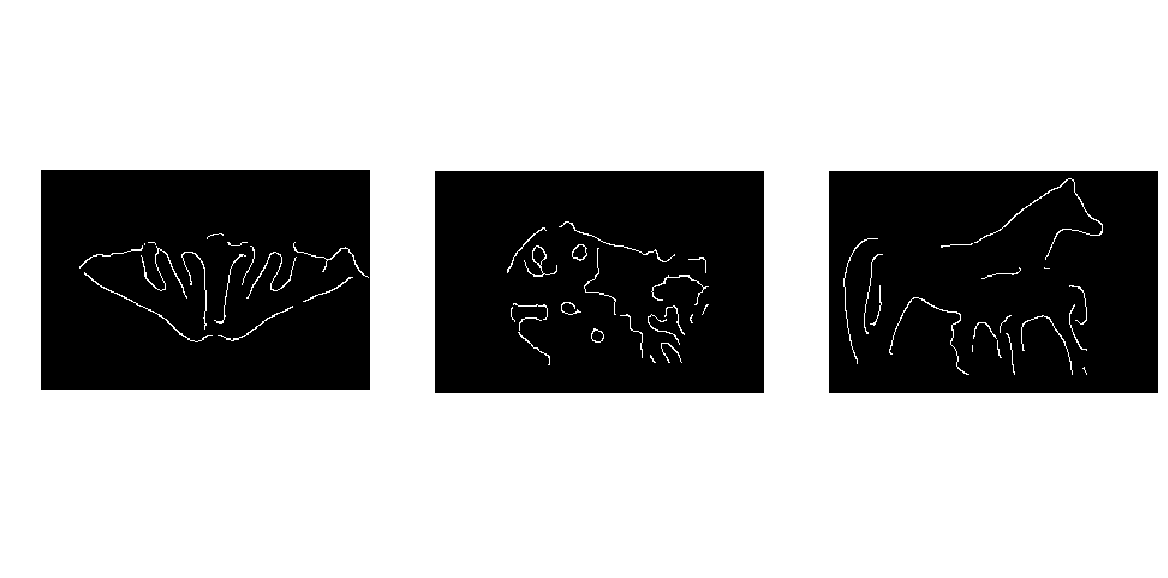

In [140]:
for y in range(183):
    for x in range(32):
        if(img1_bordes[y][x] > 0):
            img1_bordes[y][x] = 0           
for y in range(60):
    for x in range(138):
        if(img1_bordes[y][x] > 0):
            img1_bordes[y][x] = 0            
for y in range(60):
    for x in range(138):
        if(img1_bordes[y][x] > 0):
            img1_bordes[y][x] = 0

for y in range(50):
    for x in range(274):
        if(img1_bordes[y][x] > 0):
            img1_bordes[y][x] = 0

for y in range(60):
    for x in range(152 , 274):
        if(img1_bordes[y][x] > 0):
            img1_bordes[y][x] = 0
            
for y in range(145,183):
    for x in range(274):
        if(img1_bordes[y][x] > 0):
            img1_bordes[y][x] = 0
            
for y in range(110,150):
    for x in range(15 , 75):
        if(img1_bordes[y][x] > 0):
            img1_bordes[y][x] = 0 
for y in range(110,150):
    for x in range(210 , 274):
        if(img1_bordes[y][x] > 0):
            img1_bordes[y][x] = 0 
                        
# eliminacion de detalles buho


for y in range(185):
    for x in range(54):
        if(img2_bordes[y][x] > 0):
            img2_bordes[y][x] = 0     
for y in range(185):
    for x in range(235, 274):
        if(img2_bordes[y][x] > 0):
            img2_bordes[y][x] = 0  
for y in range(170, 185):
    for x in range(274):
        if(img2_bordes[y][x] > 0):
            img2_bordes[y][x] = 0  
for y in range(35):
    for x in range(274):
        if(img2_bordes[y][x] > 0):
            img2_bordes[y][x] = 0  
for y in range(52):
    for x in range(80):
        if(img2_bordes[y][x] > 0):
            img2_bordes[y][x] = 0  
for y in range(52):
    for x in range(130 , 274):
        if(img2_bordes[y][x] > 0):
            img2_bordes[y][x] = 0  
for y in range(43):
    for x in range(100):
        if(img2_bordes[y][x] > 0):
            img2_bordes[y][x] = 0  
for y in range(70):
    for x in range(200 , 274):
        if(img2_bordes[y][x] > 0):
            img2_bordes[y][x] = 0  
            
for y in range(183):
    for x in range(228 , 274):
        if(img2_bordes[y][x] > 0):
            img2_bordes[y][x] = 0              
for y in range(120 , 185):
    for x in range(215 , 274):
        if(img2_bordes[y][x] > 0):
            img2_bordes[y][x] = 0    

for y in range(160 , 185):
    for x in range(160 , 274):
        if(img2_bordes[y][x] > 0):
            img2_bordes[y][x] = 0  
            
# eliminacion de caballos            
            
for y in range(125 , 185):
    for x in range(215 , 274):
        if(img3_bordes[y][x] > 0):
            img3_bordes[y][x] = 0              
for y in range(150 , 185):
    for x in range(160 , 195):
        if(img3_bordes[y][x] > 0):
            img3_bordes[y][x] = 0    
for y in range(140 , 185):
    for x in range(120 , 140):
        if(img3_bordes[y][x] > 0):
            img3_bordes[y][x] = 0  
for y in range(170 , 185):
    for x in range(100 , 140):
        if(img3_bordes[y][x] > 0):
            img3_bordes[y][x] = 0     
for y in range(142 , 185):
    for x in range(55 , 100):
        if(img3_bordes[y][x] > 0):
            img3_bordes[y][x] = 0  
for y in range(90):
    for x in range(10):
        if(img3_bordes[y][x] > 0):
            img3_bordes[y][x] = 0 
            
for y in range(70 , 100):
    for x in range(50 , 100):
        if(img3_bordes[y][x] > 0):
            img3_bordes[y][x] = 0 
            
for y in range(70 , 105):
    for x in range(90 , 110):
        if(img3_bordes[y][x] > 0):
            img3_bordes[y][x] = 0 
for y in range(60 , 80):
    for x in range(120 , 180):
        if(img3_bordes[y][x] > 0):
            img3_bordes[y][x] = 0 
            
for y in range(170 , 185):
    for x in range(274):
        if(img3_bordes[y][x] > 0):
            img3_bordes[y][x] = 0 
for y in range(90 , 120):
    for x in range(120 , 200):
        if(img3_bordes[y][x] > 0):
            img3_bordes[y][x] = 0 
plot_x(img1_bordes,img2_bordes,img3_bordes)


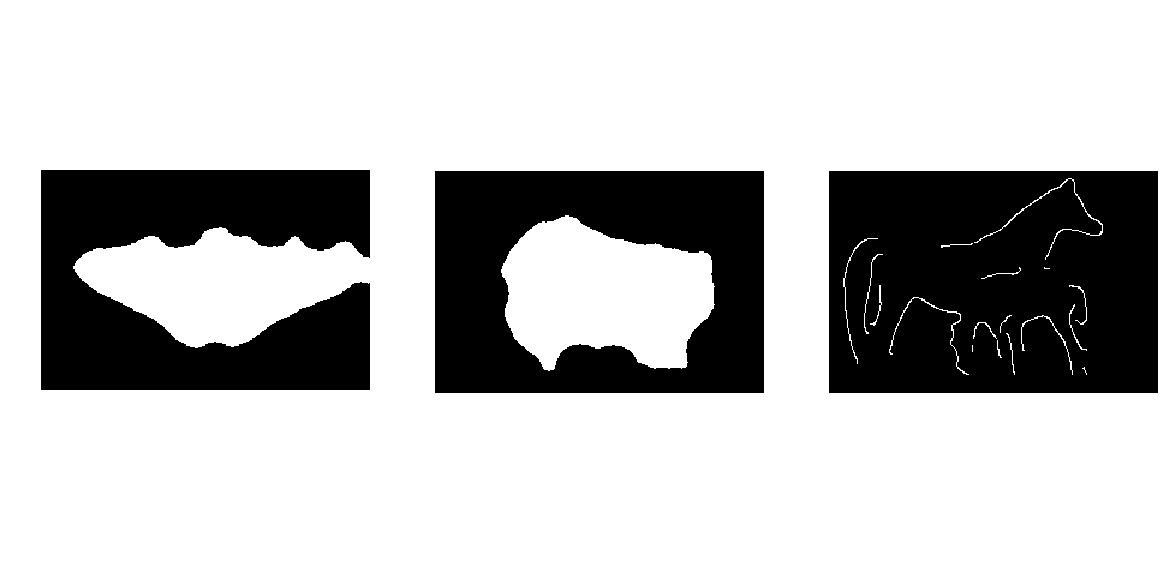

In [141]:
img1_afinando_borde=morphology.closing(image=img1_bordes, selem=disk(17))
img1_afinando_borde=morphology.dilation(image=img1_afinando_borde, selem=disk(5))
img2_afinando_borde=morphology.closing(image=img2_bordes, selem=disk(25))
img2_afinando_borde=morphology.dilation(image=img2_afinando_borde, selem=disk(5))
plot_x(img1_afinando_borde,img2_afinando_borde,img3_bordes)


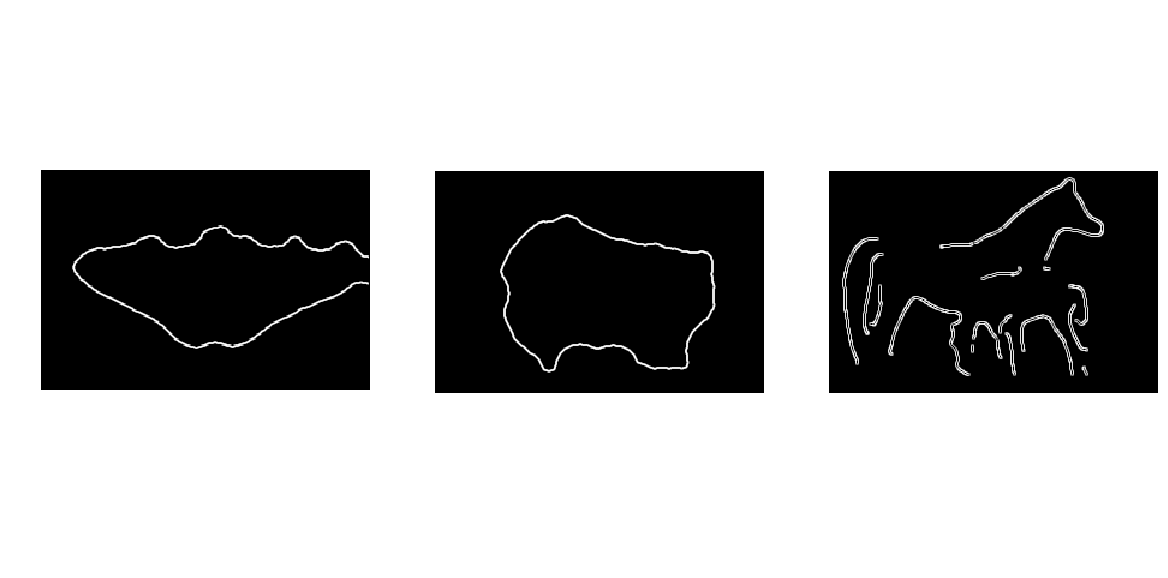

In [142]:
silueta_imagen = filters.sobel(img1_afinando_borde)
silueta_imagen2 = filters.sobel(img2_afinando_borde)
silueta_imagen3 = filters.sobel(img3_bordes)
plot_x(silueta_imagen,silueta_imagen2,silueta_imagen3)
silueta_imagenx = filters.sobel(img1_afinando_borde)
silueta_imagen2x = filters.sobel(img2_afinando_borde)
silueta_imagen3x = filters.sobel(img3_bordes)

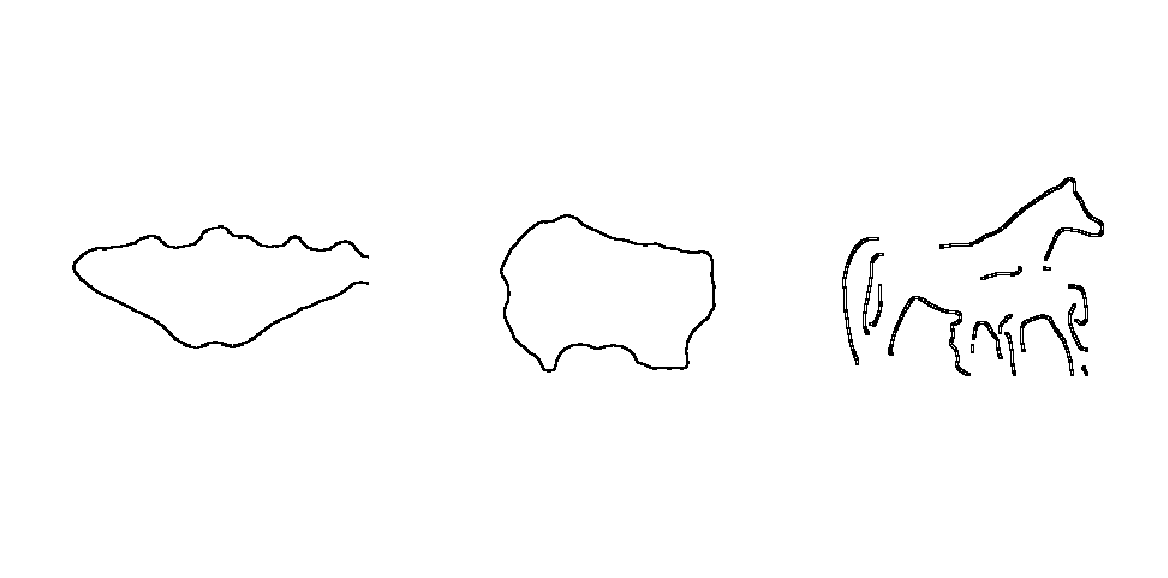

In [143]:
for y in range(183):
    for x in range(274):
        if(silueta_imagen[y][x] == 0):
            silueta_imagen[y][x] = 255
for y in range(185):
    for x in range(274):
        if(silueta_imagen2[y][x] == 0):
            silueta_imagen2[y][x] = 255
for y in range(185):
    for x in range(274):
        if(silueta_imagen3[y][x] == 0):
            silueta_imagen3[y][x] = 255
plot_x(silueta_imagen,silueta_imagen2,silueta_imagen3)


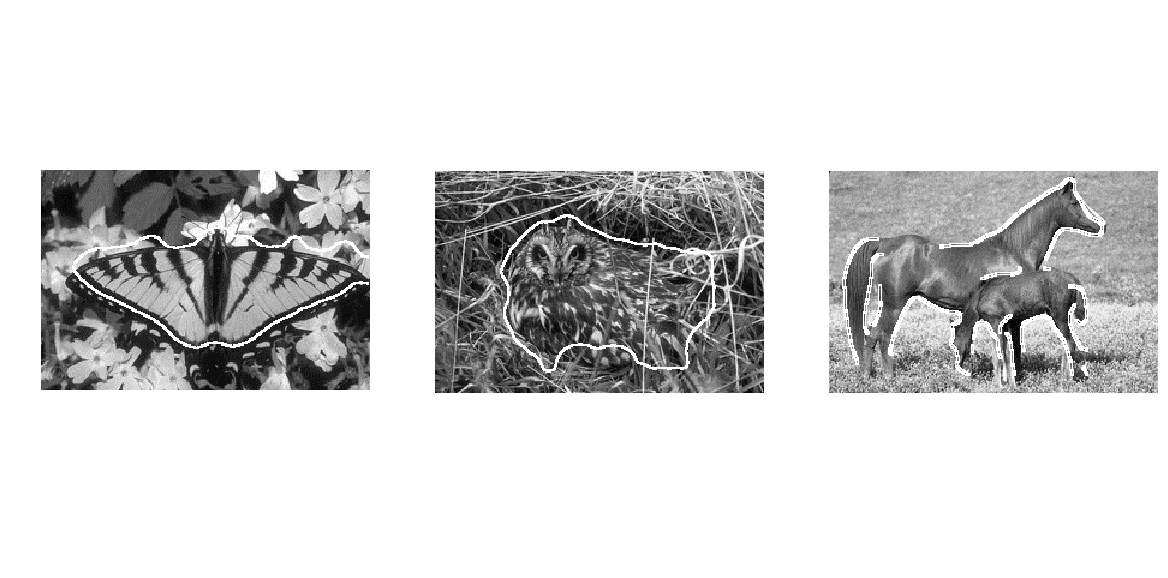

In [144]:
img = io.imread("tema10_act1a.png")
img2 = io.imread("tema10_act1b.png")
img3 = io.imread("tema10_act1c.png")
for y in range(183):
    for x in range(274):
        if(silueta_imagen[y][x] < 1):
            img[y][x] = 255
for y in range(185):
    for x in range(274):
        if(silueta_imagen2[y][x] < 1):
            img2[y][x] = 255
for y in range(185):
    for x in range(274):
        if(silueta_imagen3[y][x] < 1):
            img3[y][x] = 255
plot_x(img,img2,img3)


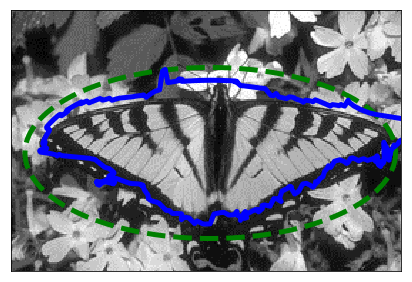

In [145]:
s = np.linspace(0, 2*np.pi, 400)
# ¿Qué sucede si cambiamos estos números para que se detecte el iris?
x = 140 + 130*np.cos(s)
y = 100 + 60*np.sin(s)
init = np.array([x, y]).T
snake = active_contour(silueta_imagenx, # 5 para iris
                       init, 
                        alpha=0.015, beta=40, gamma=0.0001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img_original, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--g', lw=5)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=5)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img_original.shape[1], img_original.shape[0], 0])

plt.show()

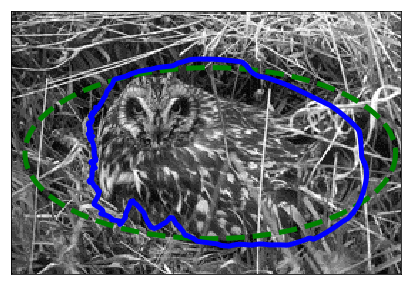

In [146]:
snake = active_contour(silueta_imagen2x, # 5 para iris
                       init, 
                        alpha=0.015, beta=27, gamma=0.0008)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img2_original, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--g', lw=5)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=5)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img2_original.shape[1], img2_original.shape[0], 0])

plt.show()